In [1]:
'''
K-Means Clustering
Problem Statement
Walmart wants to open a chain of stores across Florida and wants to find out optimal store locations to maximize revenue
Solution
Walmart already has a strong e-commerce presence
Walmart can use its online customer data to analyze the customer locations along with the monthly sales
'''

'\nK-Means Clustering\nProblem Statement\nWalmart wants to open a chain of stores across Florida and wants to find out optimal store locations to maximize revenue\nSolution\nWalmart already has a strong e-commerce presence\nWalmart can use its online customer data to analyze the customer locations along with the monthly sales\n'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set()  #for plot styling purpose

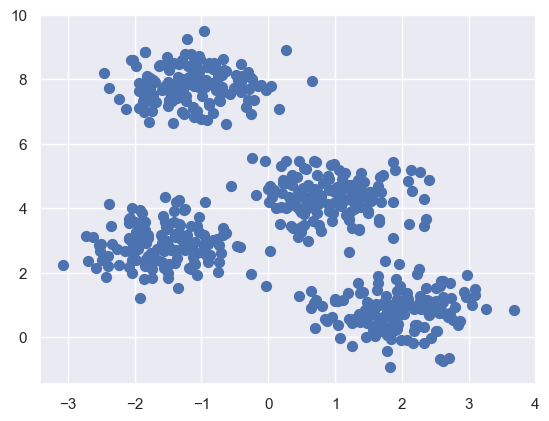

In [3]:
from sklearn.datasets import make_blobs
#make_blobs() function generates synthetic(ai generated) datasets that are spherically clustered ithas multiple datasets types and gives however we req
x,y_true=make_blobs(n_samples=600,centers=4,cluster_std=0.6,random_state=0)
'''
X = [[ 1.2,  3.4],
     [ 2.1,  4.2],
     [-0.3,  2.8],
     [ 5.6,  1.0],
     [ 3.3,  2.7]]
X[:, 0]
→ returns all the x-values (first feature) ---->[ 1.2,  2.1, -0.3,  5.6,  3.3]
X[:, 1]
→ returns all the y-values (second feature) ---->[ 3.4,  4.2,  2.8,  1.0,  2.7]
'''
plt.scatter(x[:, 0], x[:, 1], s=50);




In [4]:
from sklearn.cluster import KMeans
kmean=KMeans(n_clusters=4)
kmean.fit(x)
y_pred=kmean.predict(x)
y_pred      #it tells which cluster it belongs to out of (0,1,2,3)

array([2, 0, 2, 2, 0, 1, 3, 3, 3, 1, 2, 0, 3, 2, 3, 1, 2, 1, 2, 1, 1, 1,
       0, 1, 1, 3, 2, 1, 3, 0, 3, 3, 2, 2, 3, 1, 2, 2, 3, 3, 2, 3, 0, 3,
       3, 3, 2, 1, 2, 2, 1, 3, 2, 3, 0, 1, 0, 1, 1, 0, 2, 3, 3, 0, 2, 0,
       2, 3, 1, 3, 0, 0, 2, 1, 3, 2, 3, 3, 0, 2, 3, 0, 1, 2, 1, 3, 2, 3,
       0, 2, 3, 0, 2, 1, 2, 3, 0, 3, 2, 1, 0, 0, 2, 3, 0, 2, 0, 3, 1, 0,
       1, 0, 3, 0, 3, 3, 1, 3, 2, 2, 3, 1, 1, 1, 0, 0, 3, 1, 2, 2, 1, 1,
       1, 3, 3, 2, 3, 3, 0, 1, 0, 2, 0, 2, 1, 1, 1, 0, 3, 3, 1, 0, 2, 3,
       0, 3, 1, 0, 0, 3, 2, 1, 2, 2, 1, 2, 2, 2, 0, 1, 2, 3, 1, 2, 2, 0,
       1, 0, 0, 3, 0, 3, 3, 0, 0, 3, 1, 0, 0, 1, 3, 2, 3, 0, 3, 0, 3, 3,
       2, 0, 2, 0, 3, 2, 1, 1, 1, 1, 1, 1, 0, 0, 3, 2, 1, 2, 0, 3, 3, 2,
       0, 2, 1, 1, 3, 2, 1, 0, 0, 1, 0, 2, 3, 3, 2, 1, 3, 2, 3, 1, 2, 2,
       2, 0, 2, 1, 0, 3, 1, 0, 0, 1, 1, 3, 0, 3, 1, 0, 3, 1, 2, 0, 2, 1,
       2, 2, 0, 0, 1, 1, 0, 3, 1, 0, 0, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 2,
       2, 3, 2, 3, 1, 2, 3, 3, 2, 0, 2, 2, 1, 1, 0,

In [5]:
x

array([[ 1.72268175,  0.61528107],
       [-1.08684133,  8.15041073],
       [ 1.07568681, -0.04299697],
       ...,
       [ 0.45976418,  1.26145537],
       [ 0.76752279,  4.39759671],
       [ 0.79850568,  0.97189681]], shape=(600, 2))

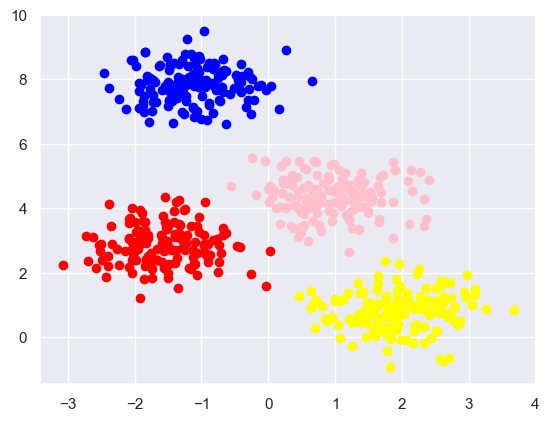

In [6]:
colors = {0: 'blue', 1: 'red', 2: 'yellow', 3: 'pink'}

# Plot each point with its corresponding color
for i in range(len(x)):
    plt.scatter(x[i][0], x[i][1], color=colors[y_pred[i]])

RNG== RandomState(MT19937)


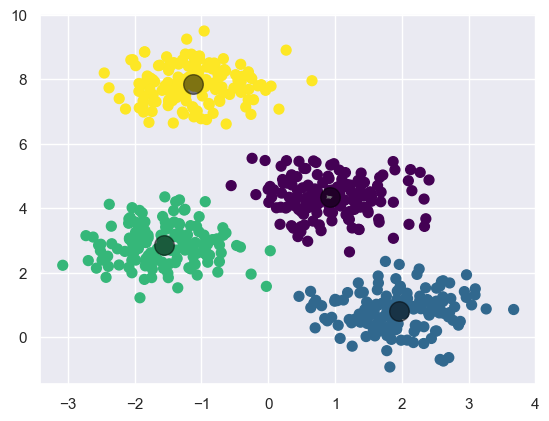

In [27]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(x, n_clusters, rseed=2):
    """
    Parameters:
    x: Input data points (2D array of shape [n_samples, n_features])
    n_clusters: Number of clusters to form
    rseed: Random seed for reproducibility

    Returns:
    centers (array): Final cluster centers (shape [n_clusters, n_features])
    labels (array): Cluster labels for each data point (shape [n_samples])
    """
    
    # 1. Initialize cluster centers randomly by shuffling data points [Random Number Generator=rng]
    rng = np.random.RandomState(rseed) # Random state for reproducibility
    print("RNG==",rng)
    centers = x[rng.permutation(x.shape[0])[:n_clusters]]  # Select 'n_clusters' random points as initial centers
    
    while True:
        # 2a. Assign each point to the nearest cluster center
        labels = pairwise_distances_argmin(x, centers)  # Returns the index of the closest center for each point
        
        # 2b. Calculate new cluster centers as the mean of all points in each cluster
        new_centers = np.array([x[labels == i].mean(0) for i in range(n_clusters)])
        if np.all(centers == new_centers): #if yes then stop
            break
        centers = new_centers
        
    return centers, labels

# Example usage
# 'x' should be a 2D numpy array where rows are data points and columns are features
centers, labels = find_clusters(x,4)

# Visualization
plt.scatter(x[:, 0], x[:, 1], c=labels, s=50, cmap='viridis')  # Plot data points colored by cluster labels
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)  # Plot cluster centers
plt.show()


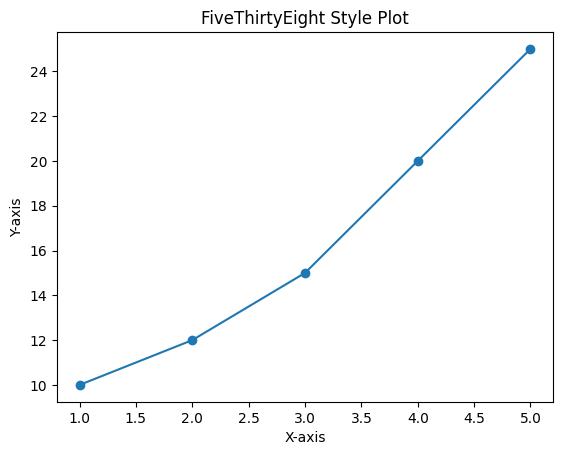

In [1]:
import matplotlib.pyplot as plt

# Use FiveThirtyEight style
# plt.style.use('fivethirtyeight')

# Sample plot
x = [1, 2, 3, 4, 5]
y = [10, 12, 15, 20, 25]

plt.plot(x, y, marker='o')
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("FiveThirtyEight Style Plot")

plt.show()



In [1]:
import tensorflow as tf
print("GPU Available:", tf.config.list_physical_devices('GPU'))


GPU Available: []
